# Group case study 2

In [1]:
#perform this step once
#conda install -c conda-forge scikit-surprise

In [1]:
%matplotlib inline

from pathlib import Path

import heapq
from collections import defaultdict

import pandas as pd
import matplotlib.pylab as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

In [2]:
# reading the csv file
cs_df = pd.read_csv('CatalogCrossSell(1).csv')

In [14]:
# displaying the df
cs_df

,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
Customer Number,,,,,,,,,
11569.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
13714.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
46391.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
67264.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
67363.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
337441034.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
337498968.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
337516678.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [4]:
#listing columns of our df
list(cs_df.columns)

['Customer Number',
 'Clothing Division',
 'Housewares Division',
 'Health Products Division',
 'Automotive Division',
 'Personal Electronics Division',
 'Computers Division',
 'Garden Division',
 'Novelty Gift Division',
 'Jewelry Division',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19']

In [5]:
# dropping empty columns and rows and declaring 'Customer Number' column as Index
cs_df.drop(columns=['Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19'], inplace = True)
cs_df.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
cs_df.set_index('Customer Number', inplace=True)

In [6]:
cs_df

,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
Customer Number,,,,,,,,,
11569.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
13714.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
46391.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
67264.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
67363.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
337441034.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
337498968.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
337516678.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


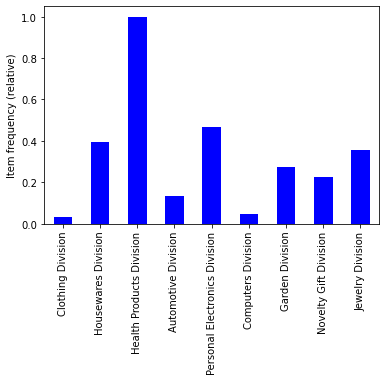

In [9]:
# determining the item frequencies
itemFrequency = cs_df.sum(axis=0) / len(cs_df)

# and plotting them as a histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [10]:
# categories
categories = apriori(cs_df, min_support =0.2, use_colnames=True)
categories

,support,itemsets
0,0.393557,(Housewares Division)
1,1.000000,(Health Products Division)
2,0.467387,(Personal Electronics Division)
3,0.272109,(Garden Division)
4,0.227491,(Novelty Gift Division)
5,0.356943,(Jewelry Division)
6,0.393557,"(Health Products Division, Housewares Division)"
7,0.235494,"(Personal Electronics Division, Housewares Div..."
8,0.467387,"(Health Products Division, Personal Electronic..."
9,0.272109,"(Health Products Division, Garden Division)"


In [11]:
# rules
rules = association_rules(categories, metric='confidence', min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Personal Electronics Division),(Housewares Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
2,(Housewares Division),(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
7,"(Health Products Division, Personal Electronic...",(Housewares Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
8,"(Health Products Division, Housewares Division)",(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
10,(Personal Electronics Division),"(Health Products Division, Housewares Division)",0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
11,(Housewares Division),"(Health Products Division, Personal Electronic...",0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
0,(Housewares Division),(Health Products Division),0.393557,1.000000,0.393557,1.000000,1.000000,0.000000,inf
3,(Personal Electronics Division),(Health Products Division),0.467387,1.000000,0.467387,1.000000,1.000000,0.000000,inf
4,(Garden Division),(Health Products Division),0.272109,1.000000,0.272109,1.000000,1.000000,0.000000,inf
5,(Novelty Gift Division),(Health Products Division),0.227491,1.000000,0.227491,1.000000,1.000000,0.000000,inf


In [12]:
# rules with single consequents
rules_single = rules[[len(c) == 1 for c in rules.consequents]]
rules_single.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Personal Electronics Division),(Housewares Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
2,(Housewares Division),(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
7,"(Health Products Division, Personal Electronic...",(Housewares Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
8,"(Health Products Division, Housewares Division)",(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
0,(Housewares Division),(Health Products Division),0.393557,1.000000,0.393557,1.000000,1.000000,0.000000,inf
3,(Personal Electronics Division),(Health Products Division),0.467387,1.000000,0.467387,1.000000,1.000000,0.000000,inf
4,(Garden Division),(Health Products Division),0.272109,1.000000,0.272109,1.000000,1.000000,0.000000,inf
5,(Novelty Gift Division),(Health Products Division),0.227491,1.000000,0.227491,1.000000,1.000000,0.000000,inf
6,(Jewelry Division),(Health Products Division),0.356943,1.000000,0.356943,1.000000,1.000000,0.000000,inf
9,"(Personal Electronics Division, Housewares Div...",(Health Products Division),0.235494,1.000000,0.235494,1.000000,1.000000,0.000000,inf


In [13]:
# sorting the rules by lift
rules_single.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25)

,antecedents,consequents,support,confidence,lift,leverage
1,(Personal Electronics Division),(Housewares Division),0.235494,0.503853,1.280252,0.051551
2,(Housewares Division),(Personal Electronics Division),0.235494,0.598373,1.280252,0.051551
7,"(Health Products Division, Personal Electronic...",(Housewares Division),0.235494,0.503853,1.280252,0.051551
8,"(Health Products Division, Housewares Division)",(Personal Electronics Division),0.235494,0.598373,1.280252,0.051551
0,(Housewares Division),(Health Products Division),0.393557,1.000000,1.000000,0.000000
3,(Personal Electronics Division),(Health Products Division),0.467387,1.000000,1.000000,0.000000
4,(Garden Division),(Health Products Division),0.272109,1.000000,1.000000,0.000000
5,(Novelty Gift Division),(Health Products Division),0.227491,1.000000,1.000000,0.000000
6,(Jewelry Division),(Health Products Division),0.356943,1.000000,1.000000,0.000000
9,"(Personal Electronics Division, Housewares Div...",(Health Products Division),0.235494,1.000000,1.000000,0.000000


LIFT: the first 4 are above 1.0, meaning that the level of association between the categories us higher than would be expected if they were independent.
CONFIDENCE: According to the confidence, Health Products has a very strong association with House, Personal Electronics, Garden, Novelty, Jewelry, Housewares, the reason of this is because most of the customers buy an item or items from the Health Products. Futher investigation of the lift should be done to accept this stament or not. 
SUPPORT: